### OIL Price Prediction

In [1]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 100) 
OilPrice = pd.read_csv ('C:\INSAID\ML\Project\Data\Oil_Price\data\daily_test.csv')
OilPrice.sample (5)

,Date,Price
69,4/9/2019,71.02
58,3/25/2019,67.37
33,2/18/2019,66.41
18,1/28/2019,59.71
29,2/12/2019,62.58


In [2]:
OilPrice.describe(include = 'all')

,Date,Price
count,82,82.000000
unique,82,NaN
top,3/11/2019,NaN
freq,1,NaN
mean,NaN,64.977195
std,NaN,4.680347
min,NaN,53.230000
25%,NaN,61.535000
50%,NaN,65.195000
75%,NaN,68.207500


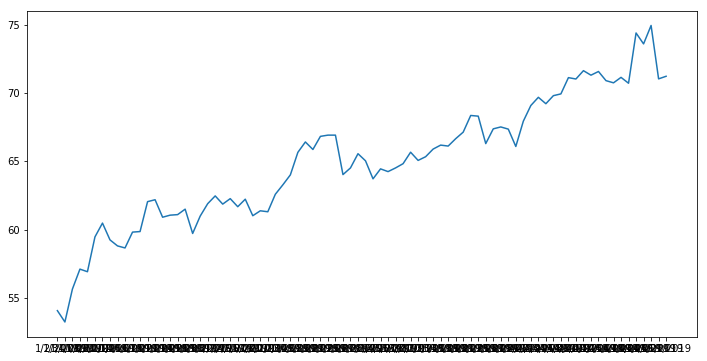

In [3]:
#setting index as date
OilPrice = OilPrice.set_index ('Date')
OilPrice

# Plotting the Oil Price History
plt.figure(figsize=(12,6))
plt.plot(OilPrice['Price'], label='Oil Price history')

In [90]:
# Convert the Date Index to a DateTimeIndex

def convert_index_to_datetimeindex(df):
    """ This is a utility function that is used to convert the index to a DateTimeIndex.
        Though the original DataFrame was imported by setting the index to the "Date" column
        this column is still in the "object" type which means it is a string. Converting the index to
        dtype = datetime64[ns] means that parts of the date can be easily extracted - like the day, month,
        and year, time deltas can be calculated and plots can be filled in with missing dates.
        Note: datetime64[ns] means a granularity of up to nanoseconds.        
    """
# converting the dates to DateTimeIndex
OilPrice.index = pd.to_datetime(OilPrice.index)
convert_index_to_datetimeindex(OilPrice)

In [91]:
OilPrice.head(5)

,Price,Days Elapsed
Date,,
2019-01-02,54.06,0
2019-01-03,53.23,1
2019-01-04,55.64,2
2019-01-07,57.10,5
2019-01-08,56.91,6


In [93]:
from datetime import timedelta, datetime, date

def convert_date_to_time_elapsed(df):
    dates = df.index

    elapsed = dates - dates[0]
    OilPrice['Days Elapsed'] = elapsed.days

convert_date_to_time_elapsed(OilPrice)

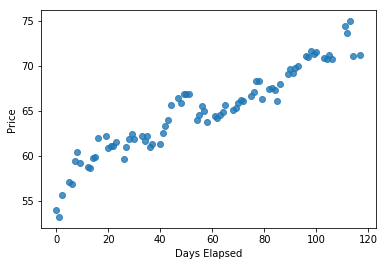

In [94]:
import seaborn as sns
sns.regplot(x='Days Elapsed', y='Price', data=OilPrice, fit_reg=False)
plt.show()

In [95]:
# Split the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = OilPrice['Days Elapsed']
X = X.values.reshape(-1,1)
y = OilPrice['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_test_pred = linreg.predict(X_test)
y_train_pred = linreg.predict(X_train)

In [96]:
linreg.score(X_train, y_train)

0.90596790465424

In [97]:
print ('Co-efficient',linreg.coef_)
print ('Intercept',linreg.intercept_)

Co-efficient [0.13058265]
Intercept 57.47706099989631


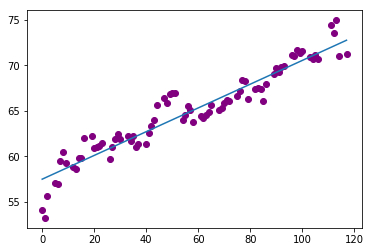

In [98]:
# Plot the Regression Line based on the Best fit line
reg_line=[(linreg.coef_*x)+linreg.intercept_ for x in OilPrice['Days Elapsed']]
plt.scatter(OilPrice['Days Elapsed'],OilPrice['Price'],color="purple")
plt.plot(OilPrice['Days Elapsed'],reg_line)
plt.show()

In [99]:
# Manually Evaluate the Model 
57.47706099989632 + 0.13058265*117

72.75523104989631

In [100]:
# Evaluate the Predicting vs Actual
Predicting : 72.75 # From the above model
Actual     : 71.22 # Actual Data

In [101]:
# Evaluate the Model performance using Root Mean Squared Error (RMSE)
# RMSE is the square root of the mean of the squared errors

print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error : 1.4354291368652992


In [102]:
# Evaluate the Model performance with Mean Absolute Error (MAE) 
# MAE is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 1.1662311899717477


In [103]:
# Evaluate the Model performance with Mean Squared Error (MSE)
# MSE is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 2.0604568069618576


### Conclusion
- Coefficient of the prediction shows the 0.905 ie __91%__ accuracy.
- For Instance, Oil Price on 2019-04-29 is __71.22__, where as the model predicted as __72.75__